C:\Users\NP_123\AppData\Local\Temp\ipykernel_15992\3254892189.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(file_path, parse_dates=['event_time'], date_parser=lambda x: pd.to_datetime(x, utc=True))


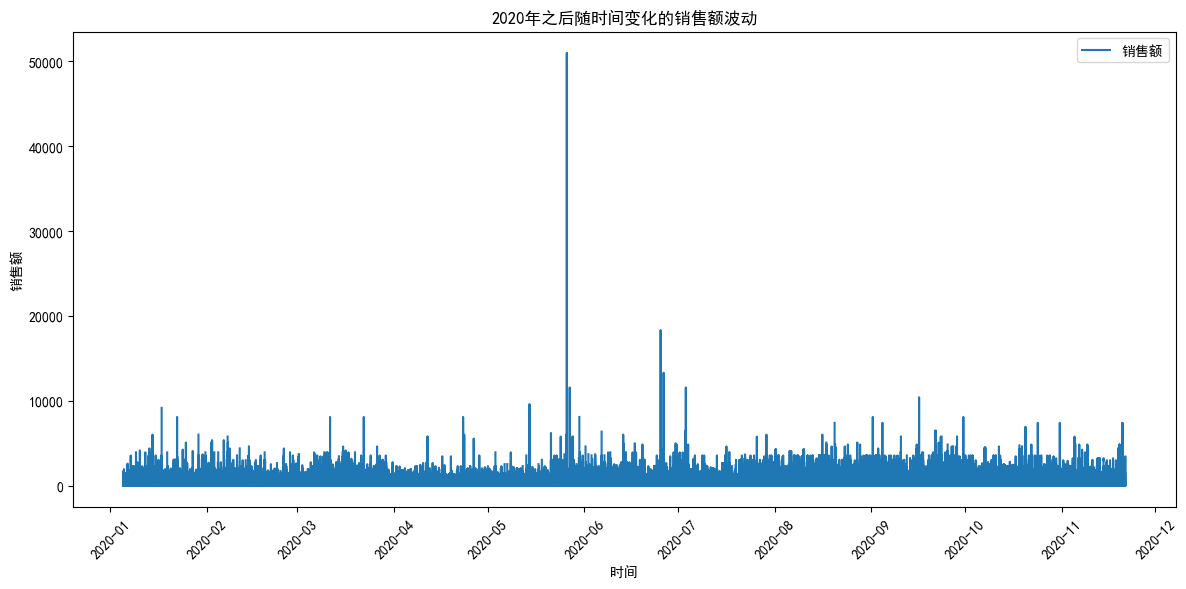

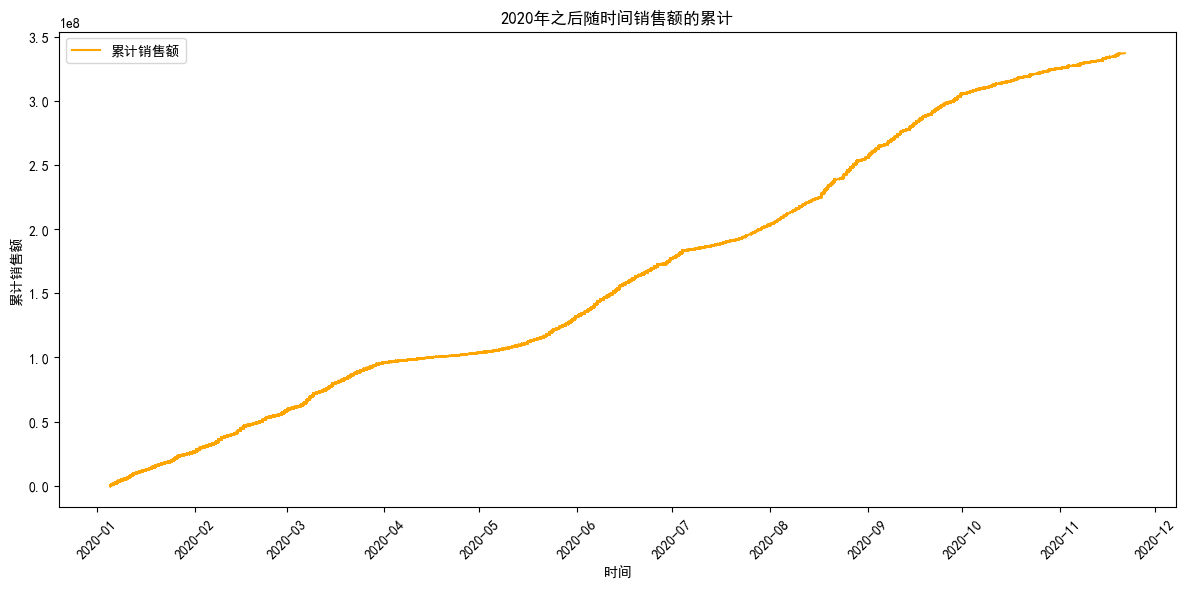

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 使用指定中文字体库
# 假设CSV数据保存在名为'sales_data.csv'的文件中
file_path = 'kz.csv'

# 读取CSV文件
data = pd.read_csv(file_path, parse_dates=['event_time'], date_parser=lambda x: pd.to_datetime(x, utc=True))

# 仅保留2020年及以后的记录
data = data[data['event_time'].dt.year >= 2020]

# 确保数据按照时间顺序排序
data.sort_values('event_time', inplace=True)

# 绘制随时间变化的销售额波动图
plt.figure(figsize=(12, 6))
plt.plot(data['event_time'], data['price'], label='销售额')
plt.title('2020年之后随时间变化的销售额波动')
plt.xlabel('时间')
plt.ylabel('销售额')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 计算随时间累积的销售额
data['cumulative_sales'] = data['price'].cumsum()

# 绘制随时间变化的销售额累计图
plt.figure(figsize=(12, 6))
plt.plot(data['event_time'], data['cumulative_sales'], label='累计销售额', color='orange')
plt.title('2020年之后随时间销售额的累计')
plt.xlabel('时间')
plt.ylabel('累计销售额')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\NP_123\AppData\Local\Temp\ipykernel_15992\1213452265.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\NP_123\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


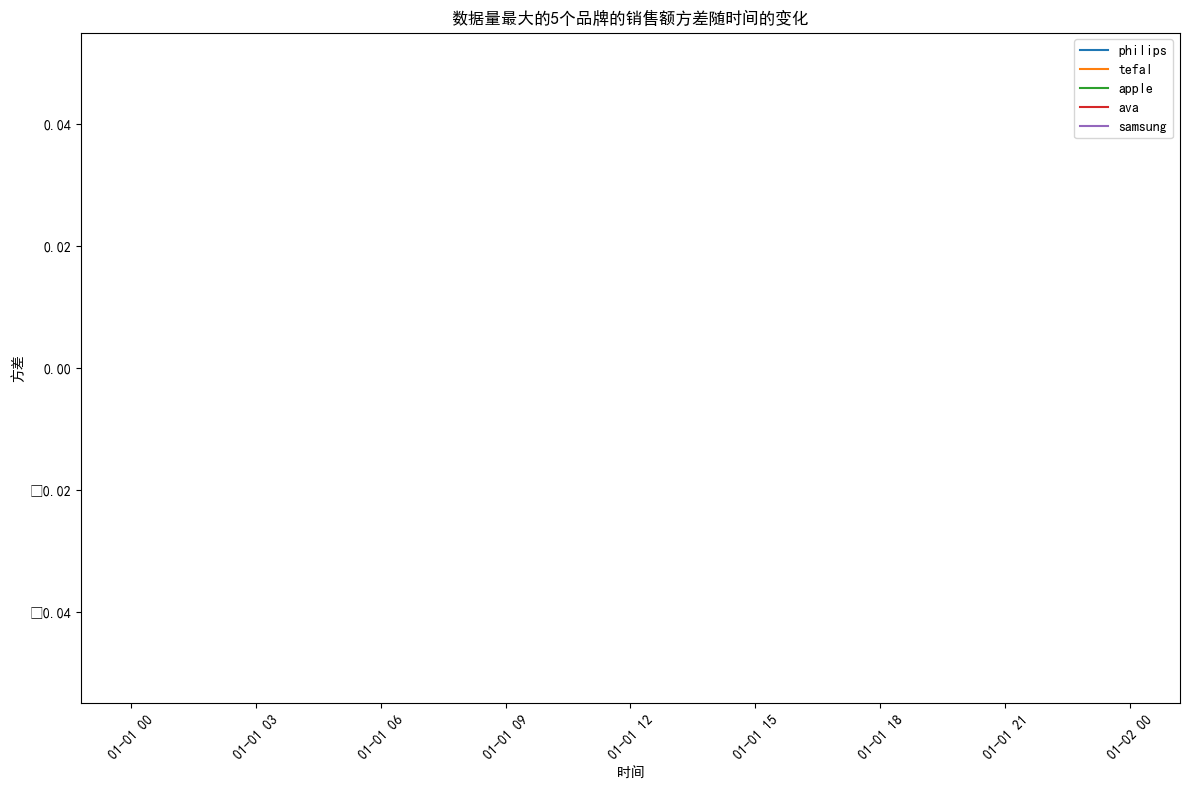

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设data是已经加载并过滤为2020年之后的DataFrame

# 计算每个品牌每日的销售总额
data['date'] = data['event_time'].dt.date
daily_sales = data.groupby(['date', 'brand'])['price'].sum().reset_index()

# 确定销售数据量最大的5个品牌
top_brands = daily_sales['brand'].value_counts().nlargest(5).index.tolist()

# 筛选出这些品牌的数据
top_brands_data = daily_sales[daily_sales['brand'].isin(top_brands)]

# 计算每个品牌每日销售额的方差
daily_variance = top_brands_data.groupby(['date', 'brand'])['price'].var().reset_index()

# 由于方差对每日销售额来说没有实际意义，我们将改为计算每个品牌在整个时间段内销售额的方差
monthly_variance_by_brand = top_brands_data.groupby('brand')['price'].var()

# 绘制图表
plt.figure(figsize=(12, 8))
for brand in top_brands:
    brand_data = daily_variance[daily_variance['brand'] == brand]
    plt.plot(brand_data['date'], brand_data['price'], label=brand)

plt.title('数据量最大的5个品牌的销售额方差随时间的变化')
plt.xlabel('时间')
plt.ylabel('方差')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
